# IMPORT PACKAGES

In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from collections import Counter
from scipy.stats.stats import pearsonr
from string import ascii_letters

# Import CSV

In [2]:
airbnb_sfo = pd.read_csv('../../../raw_data/sfo/listings-1.csv')

# Set New Scores

In [3]:
airbnb_sfo['new_agg_scores'] = airbnb_sfo['reviews_per_month'] * airbnb_sfo['review_scores_rating'] / 10

airbnb_sfo['new_agg_scores'].fillna(0, inplace = True)

# Drop Irrelevant Columns

In [4]:
#review_scores_rating
relevant_colmuns = ['amenities','new_agg_scores','number_of_reviews','host_verifications','host_listings_count', 'host_response_time', 'host_response_rate', 'host_acceptance_rate','host_is_superhost','host_has_profile_pic','host_identity_verified','accommodates','bathrooms','bedrooms','beds','availability_365','instant_bookable']
for i in airbnb_sfo.columns:
    if i not in relevant_colmuns:
        airbnb_sfo = airbnb_sfo.drop(i, axis = 1, )

# Own Functions

In [5]:
def to_deci(x):
    if type(x)==str:
        x=x.replace('%','')
        x=float(x)/100.0
    return (x)

def to_time(x):
    if x == 'within an hour':
        x='1'
    elif x == 'within a few hours':
        x='4'
    elif x == 'within a day':
        x='24'
    elif x == 'a few days or more':
        x='48'
    else:
        x='96'      
    return x

def to_int(x):
    if x=='f':
        x=x.replace('f','0')
    elif x=='t':
        x=x.replace('t','1')
    else:
        x= '0'
    return int(x)

def to_len(x):
    x = x[1:-1]
    x = x.split(',')
    x = len(x)
    return x

In [6]:
airbnb_sfo

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,amenities,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,within an hour,100%,99%,t,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,3,1.0,1.0,2.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Dry...",177,257,97.0,f
1,within a day,60%,83%,f,2,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,5,1.0,2.0,3.0,"[""Smoke alarm"", ""Heating"", ""Kitchen"", ""First a...",365,111,98.0,f
2,within a few hours,100%,100%,f,10,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",365,19,84.0,f
3,within a few hours,100%,100%,f,10,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",365,8,93.0,f
4,within a few hours,100%,0%,f,2,"['email', 'phone', 'reviews', 'kba']",t,t,4,1.5,2.0,2.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Car...",365,28,97.0,f
5,within an hour,100%,96%,t,2,"['email', 'phone', 'reviews', 'offline_governm...",t,t,3,1.0,1.0,1.0,"[""Heating"", ""Hot water"", ""Children\u2019s book...",179,736,98.0,f
6,within a few hours,100%,95%,t,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,2,1.0,1.0,1.0,"[""Heating"", ""Hot water"", ""Iron"", ""Dryer"", ""Cof...",349,531,94.0,t
7,within a day,100%,100%,t,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,4,1.0,2.0,3.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Dry...",365,337,96.0,f
8,NaN,NaN,0%,f,0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,2,1.0,NaN,1.0,"[""Smoke alarm"", ""Heating"", ""Kitchen"", ""Elevato...",364,18,99.0,f
9,within a few hours,97%,79%,t,38,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,3,1.0,3.0,3.0,"[""Refrigerator"", ""Heating"", ""Kitchen"", ""Wifi"",...",22,37,89.0,f


# Change Data Type of Columns

In [7]:
airbnb_sfo['host_response_rate'] = airbnb_sfo['host_response_rate'].fillna('0%').apply(to_deci)
airbnb_sfo['host_acceptance_rate'] = airbnb_sfo['host_acceptance_rate'].fillna('0%').apply(to_deci)

airbnb_sfo['host_response_time'] = airbnb_sfo['host_response_time'].apply(to_time).astype(int)

airbnb_sfo['host_is_superhost'] = airbnb_sfo['host_is_superhost'].apply(to_int)
airbnb_sfo['host_has_profile_pic'] = airbnb_sfo['host_has_profile_pic'].apply(to_int)
airbnb_sfo['host_identity_verified'] = airbnb_sfo['host_identity_verified'].apply(to_int)
airbnb_sfo['instant_bookable'] = airbnb_sfo['instant_bookable'].apply(to_int)

airbnb_sfo['host_verifications'] = airbnb_sfo['host_verifications'].apply(to_len)
airbnb_sfo['amenities'] = airbnb_sfo['amenities'].apply(to_len)

In [8]:
airbnb_sfo.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,amenities,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,1,1.0,0.99,1,1,5,1,1,3,1.0,1.0,2.0,30,177,257,97.0,0
1,24,0.6,0.83,0,2,5,1,1,5,1.0,2.0,3.0,15,365,111,98.0,0
2,4,1.0,1.00,0,10,5,1,0,2,4.0,1.0,1.0,15,365,19,84.0,0
3,4,1.0,1.00,0,10,5,1,0,2,4.0,1.0,1.0,14,365,8,93.0,0
4,4,1.0,0.00,0,2,4,1,1,4,1.5,2.0,2.0,25,365,28,97.0,0


# Correlation Analysis

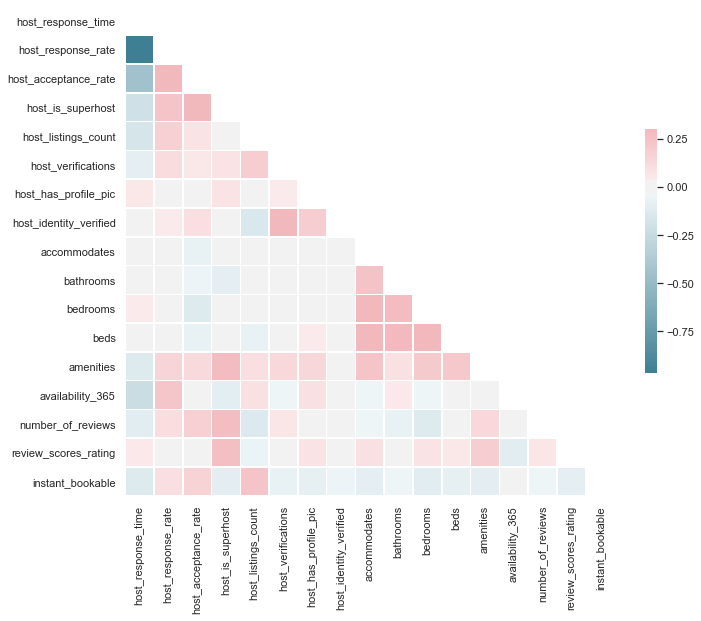

In [9]:
# calculate corr
corr = airbnb_sfo.corr()

# set up heatmap
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
results = airbnb_sfo.corr().unstack().sort_values(ascending=False)
print('The correlation of the new_score_reviews against all:', results['new_agg_scores'][1:-1])

The correlation of the new_score_reviews against all: host_is_superhost         0.264432
amenities                 0.192671
accommodates              0.092825
bedrooms                  0.080120
host_has_profile_pic      0.073718
number_of_reviews         0.059199
beds                      0.056441
host_response_time        0.045605
host_verifications        0.029410
host_identity_verified    0.004810
bathrooms                -0.014478
host_response_rate       -0.016896
host_acceptance_rate     -0.028691
host_listings_count      -0.057570
instant_bookable         -0.090932
dtype: float64
